<a href="https://colab.research.google.com/github/FreMeli/ASE_1/blob/main/Lugar_Edo_Sex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Vamos a leer y cargar 3 archivos
  1.  --> Contiene el total de la población por años. Fuente: CONAPO 
  2. INEGI_LUGAR.xls--> Contiene el número de homicidios en vía pública o vivienda para hombres y mujeres por año y por estado. Fuente:INEGI
  3. INEGI_EDAD_Lugar.xls--> Contiene el número de homicidios en vía pública o vivienda para hombres y mujeres por edad, por año y por estado. Fuente:INEGI

  *La edad va de -1 año, 1-4, 5-9, 10-14 ... 80-84, 85 y +

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns #importamos la librería
sns.set()#inicializamos le estilo de los gráficos
import pandas as pd
import numpy as np

from google.colab import files 
import io

In [130]:
upload = files.upload()

Saving INEGI_LUGAR_EDAD.xls to INEGI_LUGAR_EDAD.xls


##Ordenamos los datos de la conapo para poderlos usar

In [50]:
df_P=pd.read_excel(io.BytesIO(upload["CONAPO_POB_Años.xlsx"]), header=0)#df con los datos de la población
df_P.head(10) #Para ver las primeras 10 filas

,Unnamed: 0,RENGLON,AÑO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION
0,11000,11001,2000,República Mexicana,0,0,Hombres,1161986
1,11001,11002,2000,República Mexicana,0,0,Mujeres,1120877
2,11002,11003,2000,República Mexicana,0,1,Hombres,1162710
3,11003,11004,2000,República Mexicana,0,1,Mujeres,1119109
4,11004,11005,2000,República Mexicana,0,2,Hombres,1165350
5,11005,11006,2000,República Mexicana,0,2,Mujeres,1120670
6,11006,11007,2000,República Mexicana,0,3,Hombres,1167974
7,11007,11008,2000,República Mexicana,0,3,Mujeres,1124367
8,11008,11009,2000,República Mexicana,0,4,Hombres,1170745
9,11009,11010,2000,República Mexicana,0,4,Mujeres,1128741


In [51]:
df_P.drop(columns=['Unnamed: 0', 'RENGLON','CVE_GEO'], inplace=True, axis=1)

In [52]:
df_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159720 entries, 0 to 159719
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   AÑO        159720 non-null  int64 
 1   ENTIDAD    159720 non-null  object
 2   EDAD       159720 non-null  int64 
 3   SEXO       159720 non-null  object
 4   POBLACION  159720 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.1+ MB


In [53]:
df_P

,AÑO,ENTIDAD,EDAD,SEXO,POBLACION
0,2000,República Mexicana,0,Hombres,1161986
1,2000,República Mexicana,0,Mujeres,1120877
2,2000,República Mexicana,1,Hombres,1162710
3,2000,República Mexicana,1,Mujeres,1119109
4,2000,República Mexicana,2,Hombres,1165350
...,...,...,...,...,...
159715,2021,Zacatecas,107,Mujeres,1
159716,2021,Zacatecas,108,Hombres,0
159717,2021,Zacatecas,108,Mujeres,0
159718,2021,Zacatecas,109,Hombres,0


In [111]:
df_lugar=pd.read_excel(io.BytesIO(upload["INEGI_LUGAR.xls"]), header=0)#df con los datos de la población
df_lugar.head(10) #Para ver las primeras 10 filas

,AÑO,ENTIDAD,LUGAR,HOMBRES,MUJERES,TOTAL
0,2000,Total,Vivienda particular,1160.0,480.0,1640
1,2000,Total,Calle o carretera (Vía pública),4640.0,356.0,5002
2,2000,Total,Otro,1012.0,107.0,1120
3,2000,Aguascalientes,Vivienda particular,4.0,2.0,6
4,2000,Aguascalientes,Calle o carretera (Vía pública),7.0,2.0,9
5,2000,Baja California,Vivienda particular,36.0,7.0,43
6,2000,Baja California,Calle o carretera (Vía pública),156.0,4.0,160
7,2000,Baja California,Otro,35.0,8.0,43
8,2000,Baja California Sur,Vivienda particular,5.0,3.0,8
9,2000,Baja California Sur,Calle o carretera (Vía pública),8.0,1.0,9


In [65]:
upload1 = files.upload()

Saving CONAPO_POB.xlsx to CONAPO_POB.xlsx
Saving df_edo_sexo.xlsx to df_edo_sexo.xlsx


In [66]:
df_PT=pd.read_excel(io.BytesIO(upload1["CONAPO_POB.xlsx"]), header=0)
df_PT 

,AÑO,ENTIDAD,HOMBRES,MUJERES
0,2000,República Mexicana,48255807,49900635
1,2000,Aguascalientes,464024,488559
2,2000,Baja California,1247252,1211307
3,2000,Baja California Sur,219018,207555
4,2000,Campeche,350339,347621
...,...,...,...,...
721,2021,Tamaulipas,1812500,1852763
722,2021,Tlaxcala,676446,711366
723,2021,Veracruz,4156871,4408019
724,2021,Yucatán,1118236,1153344


In [67]:
df=pd.read_excel(io.BytesIO(upload1["df_edo_sexo.xlsx"]), header=0)
#df que junta homicidios y la población total
df 

,Unnamed: 0,AÑO,ENTIDAD,HOMBRES,MUJERES
0,0,2000,Total,9442,1284
1,1,2000,Aguascalientes,13,4
2,2,2000,Baja California,408,32
3,3,2000,Baja California Sur,23,5
4,4,2000,Campeche,60,5
...,...,...,...,...,...
1447,1447,2021,Tamaulipas,1812500,1852763
1448,1448,2021,Tlaxcala,676446,711366
1449,1449,2021,Veracruz,4156871,4408019
1450,1450,2021,Yucatán,1118236,1153344


##Gráficando

% de los homicidios por lugar de ocurrencia y sexo de la víctima = 100*homicidios en el lugar/total de homicidios

In [127]:
tasas_H=[]
tasas_M=[]
for i in range(len(df_lugar)):
  if df_lugar.iloc[i]['LUGAR']=="Vivienda particular" and df_lugar.iloc[i]['ENTIDAD']=="Total":
    tasas_H.append((df_lugar.iloc[i]['HOMBRES']/float(df_lugar.iloc[i]['TOTAL']))*100) 
    tasas_M.append((df_lugar.iloc[i]['MUJERES']/float(df_lugar.iloc[0]['TOTAL']))*100)

Text(0.5, 1.0, '% DE HOMICIDIOS EN LA VIVIENDA')

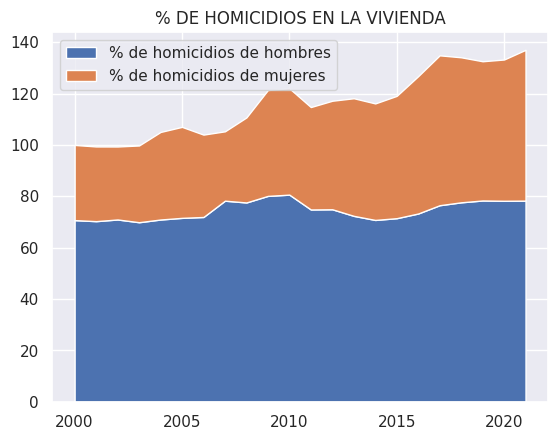

In [128]:
years=list(range(2000, 2022))
plt.stackplot(years,tasas_H, tasas_M, labels=['% de homicidios de hombres','% de homicidios de mujeres'])
plt.legend(loc='upper left')
plt.title('% DE HOMICIDIOS EN LA VIVIENDA') #Título del gráfico

In [133]:
df_LE=pd.read_excel(io.BytesIO(upload["INEGI_LUGAR_EDAD.xls"]), header=0)
df_LE

,AÑO,ENTIDAD,EDAD,LUGAR,HOMBRES,MUJER,TOTAL
0,2000,Total,Total,Vivienda particular,1160.0,480.0,1640
1,2000,Total,Total,Calle o carretera (Vía pública),4640.0,356.0,5002
2,2000,Total,Total,Otro,1012.0,107.0,1120
3,2000,Total,Menores de 1 año,Vivienda particular,9.0,7.0,16
4,2000,Total,Menores de 1 año,Calle o carretera (Vía pública),5.0,9.0,17
...,...,...,...,...,...,...,...
29393,2021,Zacatecas,70-74 años,Calle o carretera (Vía pública),2.0,NaN,2
29394,2021,Zacatecas,70-74 años,Otro,1.0,NaN,1
29395,2021,Zacatecas,75-79 años,Vivienda particular,2.0,1.0,3
29396,2021,Zacatecas,75-79 años,Calle o carretera (Vía pública),1.0,NaN,1


In [ ]:
tasas_H=[]
tasas_M=[]
for i in range(len(df_lugar)):
  if df_LE.iloc[i]['LUGAR']=="Vivienda particular" and df_lugar.iloc[i]['ENTIDAD']=="Total":
    tasas_H.append((df_lugar.iloc[i]['HOMBRES']/float(df_lugar.iloc[i]['TOTAL']))*100) 
    tasas_M.append((df_lugar.iloc[i]['MUJERES']/float(df_lugar.iloc[0]['TOTAL']))*100)

In [ ]:
edades = ["menores de 1 año", "1-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84","85 y más"]
#years=list(range(2000, 2022))
plt.stackplot(years,tasas_H, tasas_M, labels=['% de homicidios de hombres','% de homicidios de mujeres'])
plt.legend(loc='upper left')
plt.title('% DE HOMICIDIOS EN LA VIVIENDA') #Título del gráfico

In [134]:
edades = ["menores de 1 año", "1-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84","85 y más"]

In [135]:
len(edades)

19